In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
dataset = pd.read_csv('credit_card_challenge.csv')
print(len(dataset))

30000


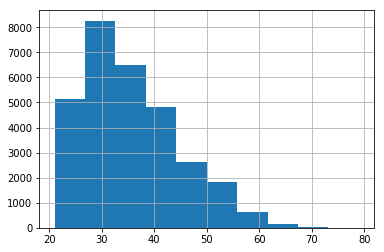

In [3]:
dataset.AGE.hist()

In [4]:
dataset = dataset[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4' ]]
dataset.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,689.0,0.0,0.0
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,0.0,1000.0,1000.0,1000.0
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,1518.0,1500.0,1000.0,1000.0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,2000.0,2019.0,1200.0,1100.0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,2000.0,36681.0,10000.0,9000.0


In [5]:
#SPLIT DATASET
X = dataset[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4' ]]
y = dataset[['AGE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [6]:
#feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
X.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4
0,20000.0,3913.0,3102.0,689.0,0.0,0.0,689.0,0.0,0.0
1,120000.0,2682.0,1725.0,2682.0,3272.0,0.0,1000.0,1000.0,1000.0
2,90000.0,29239.0,14027.0,13559.0,14331.0,1518.0,1500.0,1000.0,1000.0
3,50000.0,46990.0,48233.0,49291.0,28314.0,2000.0,2019.0,1200.0,1100.0
4,50000.0,8617.0,5670.0,35835.0,20940.0,2000.0,36681.0,10000.0,9000.0


In [8]:
y.head()

,AGE
0,24
1,26
2,34
3,37
4,57


In [9]:
from sklearn import neighbors
#Building the model
knn = neighbors.KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [10]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_train, y_train, cv=30)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: -0.27 (+/- 0.09)


In [11]:
'''
Y_ = knn.predict(X_train)
T = X_train[:, np.newaxis]
plt.scatter(X,Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

'''

"\nY_ = knn.predict(X_train)\nT = X_train[:, np.newaxis]\nplt.scatter(X,Y, c='k', label='data')\nplt.plot(T, Y_, c='g', label='prediction')\nplt.legend()\nplt.title('K=10, Unweighted')\nplt.show()\n\n"

In [12]:
'''
Y_ = knn.predict(y_train)
plt.scatter(X,Y, c='k', label='data')
plt.plot(X_train, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()
'''

"\nY_ = knn.predict(y_train)\nplt.scatter(X,Y, c='k', label='data')\nplt.plot(X_train, Y_, c='g', label='prediction')\nplt.legend()\nplt.title('K=10, Unweighted')\nplt.show()\n"

In [13]:
'''
from sklearn import neighbors
#Building the model, this was your original code
knn = neighbors.KNeighborsRegressor(n_neighbors=173)
X = dataset[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4' ]]
Y = dataset[['AGE']]
knn.fit(X, Y)

#here's where we predict

T = np.arange(0, 50, 0.1)[:, np.newaxis]

#having an underscore attached to the variable is common when it represents a prediction
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=173, Unweighted')
plt.show()
'''

"\nfrom sklearn import neighbors\n#Building the model, this was your original code\nknn = neighbors.KNeighborsRegressor(n_neighbors=173)\nX = dataset[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4' ]]\nY = dataset[['AGE']]\nknn.fit(X, Y)\n\n#here's where we predict\n\nT = np.arange(0, 50, 0.1)[:, np.newaxis]\n\n#having an underscore attached to the variable is common when it represents a prediction\nY_ = knn.predict(T)\n\nplt.scatter(X, Y, c='k', label='data')\nplt.plot(T, Y_, c='g', label='prediction')\nplt.legend()\nplt.title('K=173, Unweighted')\nplt.show()\n"

# Since all the data is right skewed, I'll try log transforming the data to see if that improves accuracy.

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


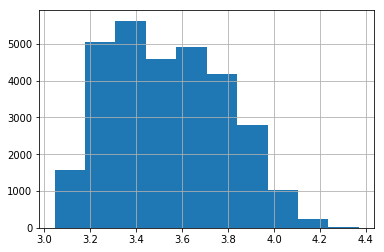

In [14]:
dataset['AGE'] = np.log(dataset.AGE)
dataset['LIMIT_BAL'] = np.log(dataset.LIMIT_BAL)
dataset['BILL_AMT1'] = np.where(dataset.BILL_AMT1 > 0, np.log(dataset.BILL_AMT1), 0)
dataset['PAY_AMT1'] = np.where(dataset.PAY_AMT1 > 0, np.log(dataset.PAY_AMT1), 0)
dataset['PAY_AMT2'] = np.where(dataset.PAY_AMT2 > 0, np.log(dataset.PAY_AMT2), 0)
dataset['PAY_AMT3'] = np.where(dataset.PAY_AMT3 > 0, np.log(dataset.PAY_AMT3), 0)
dataset['PAY_AMT4'] = np.where(dataset.PAY_AMT4 > 0, np.log(dataset.PAY_AMT4), 0)

logdataset = dataset[['AGE', 'LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4']]
logdataset.AGE.hist()


In [15]:
#SPLIT DATASET
X = logdataset[['LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4' ]]
y = logdataset[['AGE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [16]:
#feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [17]:
from sklearn import neighbors
#Building the model
knn = neighbors.KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [18]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_train, y_train, cv=30)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: -0.27 (+/- 0.10)


# Running nearest neigbors again, weighted by distance.

In [19]:
dataset['AGE'] = np.log(dataset.AGE)
dataset['LIMIT_BAL'] = np.log(dataset.LIMIT_BAL)
dataset['BILL_AMT1'] = np.where(dataset.BILL_AMT1 > 0, np.log(dataset.BILL_AMT1), 0)
dataset['PAY_AMT1'] = np.where(dataset.PAY_AMT1 > 0, np.log(dataset.PAY_AMT1), 0)
dataset['PAY_AMT2'] = np.where(dataset.PAY_AMT2 > 0, np.log(dataset.PAY_AMT2), 0)
dataset['PAY_AMT3'] = np.where(dataset.PAY_AMT3 > 0, np.log(dataset.PAY_AMT3), 0)
dataset['PAY_AMT4'] = np.where(dataset.PAY_AMT4 > 0, np.log(dataset.PAY_AMT4), 0)

logdataset = dataset[['AGE', 'LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4']]

#SPLIT DATASET
X = logdataset[['LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4' ]]
y = logdataset[['AGE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
from sklearn import neighbors
#Building the model
knn = neighbors.KNeighborsRegressor(n_neighbors=3, weights='distance')

knn.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_train, y_train, cv=30)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


Weighted Accuracy: -0.30 (+/- 0.10)


# I'll try this again with just AGE as my dependent variable and LIMIT_BAL as my feature

In [20]:


dataset = dataset[['AGE', 'LIMIT_BAL']]

#SPLIT DATASET
X = dataset[['LIMIT_BAL']]
y = dataset[['AGE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
from sklearn import neighbors
#Building the model
knn = neighbors.KNeighborsRegressor(n_neighbors=3, weights='distance')

knn.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_train, y_train, cv=30)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Weighted Accuracy: -0.24 (+/- 0.17)


# I'll try this a different way, I'll see if age can predict the credit limit

In [21]:
dataset = dataset[['AGE', 'LIMIT_BAL']]

#SPLIT DATASET
X = dataset[['AGE']]
y = dataset[['LIMIT_BAL']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
from sklearn import neighbors
#Building the model
knn = neighbors.KNeighborsRegressor(n_neighbors=3, weights='distance')

knn.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_train, y_train, cv=30)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Weighted Accuracy: -0.14 (+/- 0.14)


In [22]:
#eval 1
#cm = confusion_matrix(y-test, y_pred)

In [23]:
#eval 2
#print((f1_score(y_test, y_pred))

In [24]:
#eval 3
#print(accuracy_score(y_test, y_pred))

# OLS model begins here

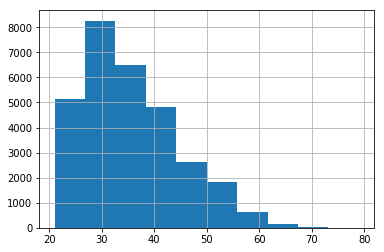

In [25]:


dataset = pd.read_csv('credit_card_challenge.csv')

dataset = dataset[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4' ]]
dataset.head()
dataset.AGE.hist()

#SPLIT DATASET
#X = dataset[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4' ]]
#y = dataset[['AGE']]
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)




#linear_formula = 'logpropertycrime ~ logpopulation+logrobbery'
#lm = smf.ols(formula=linear_formula, data=logdataset).fit()





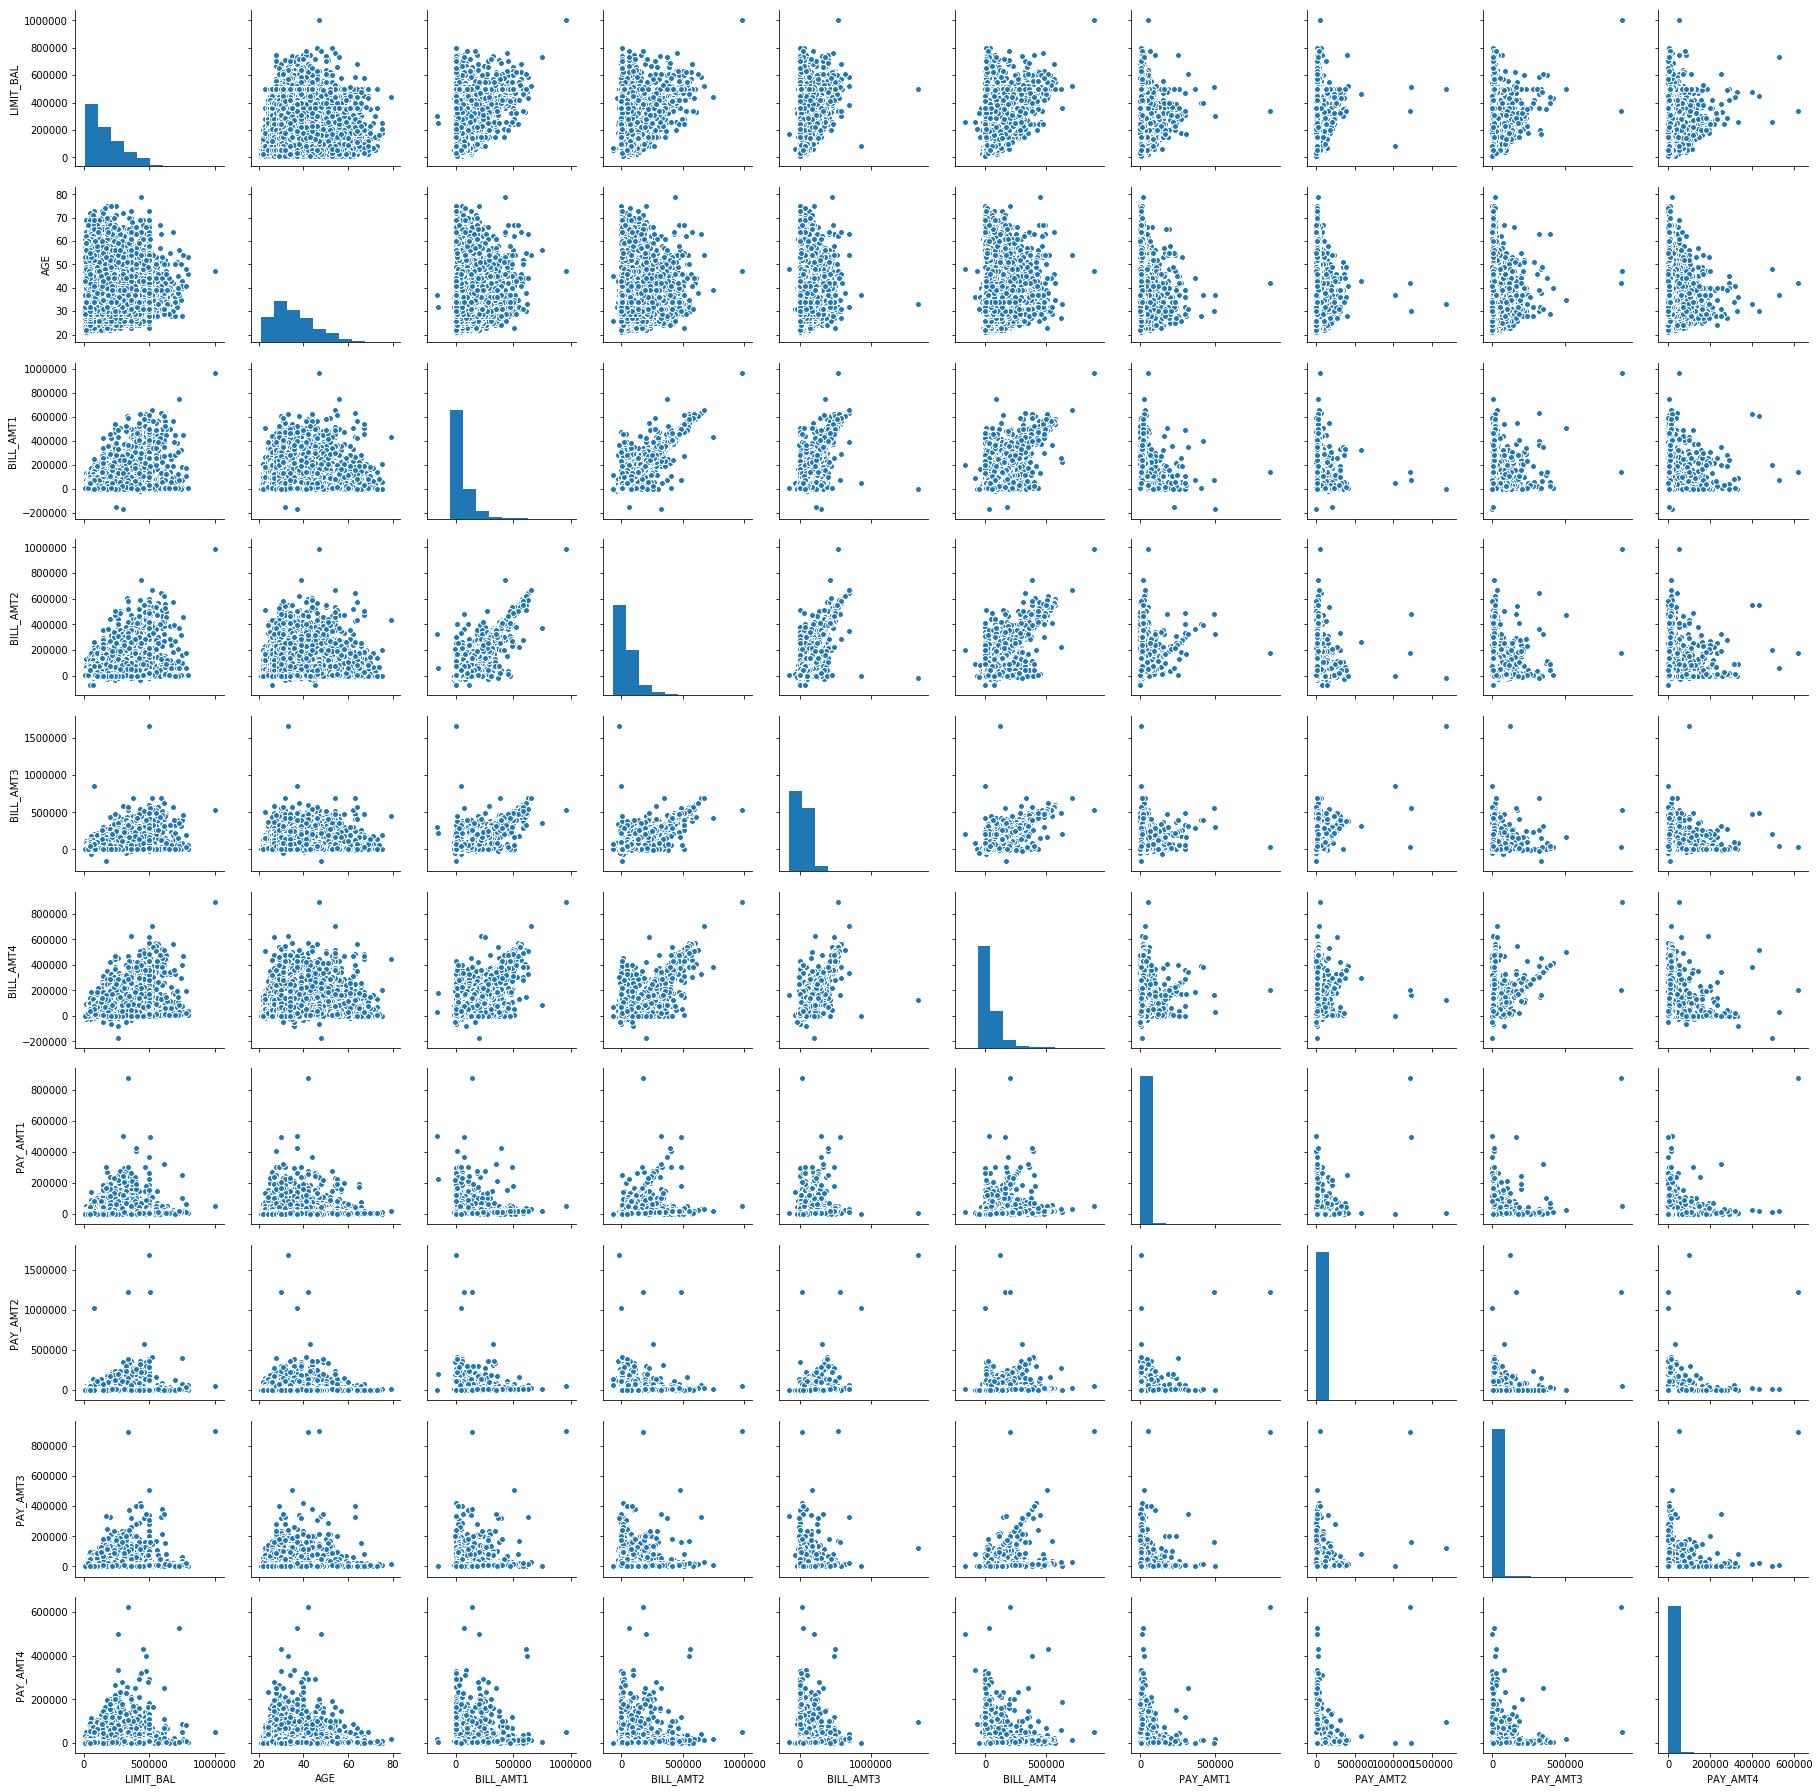

In [26]:
import seaborn as sns
sns.pairplot(dataset)

           LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
LIMIT_BAL   1.000000  0.144713   0.285430   0.278314   0.283236   0.293988   
AGE         0.144713  1.000000   0.056239   0.054283   0.053710   0.051353   
BILL_AMT1   0.285430  0.056239   1.000000   0.951484   0.892279   0.860272   
BILL_AMT2   0.278314  0.054283   0.951484   1.000000   0.928326   0.892482   
BILL_AMT3   0.283236  0.053710   0.892279   0.928326   1.000000   0.923969   
BILL_AMT4   0.293988  0.051353   0.860272   0.892482   0.923969   1.000000   
PAY_AMT1    0.195236  0.026147   0.140277   0.280365   0.244335   0.233012   
PAY_AMT2    0.178408  0.021785   0.099355   0.100851   0.316936   0.207564   
PAY_AMT3    0.210167  0.029247   0.156887   0.150718   0.130011   0.300023   
PAY_AMT4    0.203242  0.021379   0.158303   0.147398   0.143405   0.130191   

           PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  
LIMIT_BAL  0.195236  0.178408  0.210167  0.203242  
AGE        0.026147  0.021785  0.0292

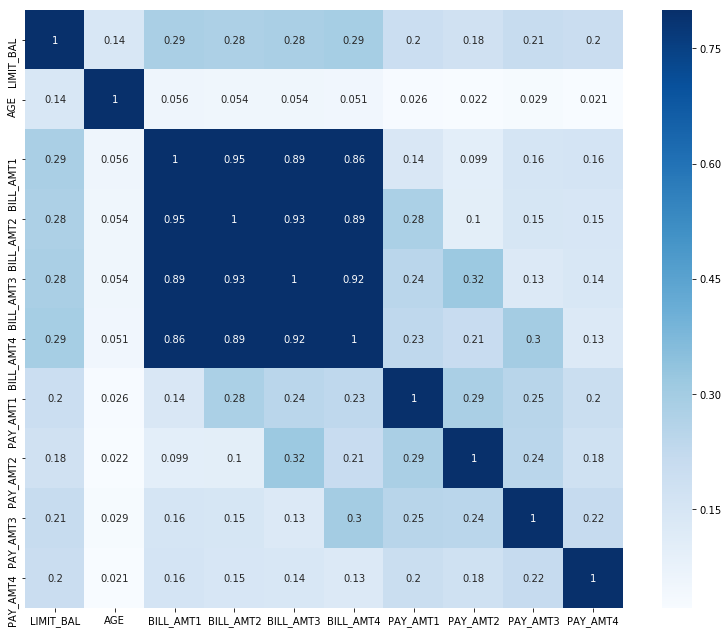

In [27]:
# Make the correlation matrix.
corrmat = dataset.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

In [28]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std 

linear_formula = 'AGE ~ LIMIT_BAL+BILL_AMT1+BILL_AMT2+BILL_AMT3+BILL_AMT4+PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4'
lm = smf.ols(formula=linear_formula, data=dataset).fit()

In [29]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AGE   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     73.03
Date:                Sun, 16 Sep 2018   Prob (F-statistic):          3.42e-134
Time:                        22:04:12   Log-Likelihood:            -1.0888e+05
No. Observations:               30000   AIC:                         2.178e+05
Df Residuals:                   29990   BIC:                         2.179e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.7156      0.088    383.398      0.000      33.543      33.888
LIMIT_BAL   1.016e-05   4.39e-07     23.139      0.000     9.3e-06     1.1e-05
BILL_AMT1   2.171e-06   2.65e-06      0.819      0.413   -3.03e-06    7.37e-06
BILL_AMT2  -4.252e-07   3.74e-06     -0.114      0.909   -7.76e-06    6.91e-06
BILL_AMT3   5.449e-06   3.53e-06      1.544      0.123   -1.47e-06    1.24e-05
BILL_AMT4  -5.643e-06   2.66e-06     -2.124      0.034   -1.09e-05   -4.36e-07
PAY_AMT1   -7.709e-07   4.09e-06     -0.189      0.850   -8.79e-06    7.25e-06
PAY_AMT2   -3.889e-06   3.39e-06     -1.147      0.251   -1.05e-05    2.76e-06
PAY_AMT3    4.425e-06   3.89e-06      1.137      0.256    -3.2e-06    1.21e-05
PAY_AMT4   -6.178e-06   3.58e-06     -1.728      0.084   -1.32e-05    8.31e-07
==============================================================================
Omnibus:                     2650.375   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3419.756
Skew:                           0.825   Prob(JB):                         0.00
Kurtosis:                       3.128   Cond. No.                     4.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std 

linear_formula = 'AGE ~ LIMIT_BAL+BILL_AMT1+PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4'
lm = smf.ols(formula=linear_formula, data=dataset).fit()

In [31]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AGE   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     108.8
Date:                Sun, 16 Sep 2018   Prob (F-statistic):          3.22e-136
Time:                        22:04:12   Log-Likelihood:            -1.0888e+05
No. Observations:               30000   AIC:                         2.178e+05
Df Residuals:                   29993   BIC:                         2.178e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.7164      0.088    383.546      0.000      33.544      33.889
LIMIT_BAL   1.012e-05   4.38e-07     23.091      0.000    9.26e-06     1.1e-05
BILL_AMT1   2.204e-06   7.55e-07      2.922      0.003    7.26e-07    3.68e-06
PAY_AMT1   -6.954e-07   3.43e-06     -0.202      0.840   -7.43e-06    6.04e-06
PAY_AMT2   -1.301e-06   2.45e-06     -0.531      0.595    -6.1e-06     3.5e-06
PAY_AMT3   -1.595e-07   3.22e-06     -0.050      0.960   -6.47e-06    6.15e-06
PAY_AMT4   -5.572e-06   3.55e-06     -1.571      0.116   -1.25e-05    1.38e-06
==============================================================================
Omnibus:                     2651.576   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3421.862
Skew:                           0.825   Prob(JB):                         0.00
Kurtosis:                       3.127   Cond. No.                     3.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Since all the data is right skewed, I'll try log transforming the data to see if that improves accuracy.

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


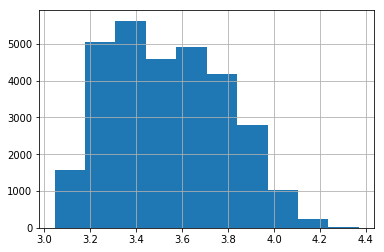

In [32]:
dataset['AGE'] = np.log(dataset.AGE)
dataset['LIMIT_BAL'] = np.log(dataset.LIMIT_BAL)
dataset['BILL_AMT1'] = np.where(dataset.BILL_AMT1 > 0, np.log(dataset.BILL_AMT1), 0)
dataset['PAY_AMT1'] = np.where(dataset.PAY_AMT1 > 0, np.log(dataset.PAY_AMT1), 0)
dataset['PAY_AMT2'] = np.where(dataset.PAY_AMT2 > 0, np.log(dataset.PAY_AMT2), 0)
dataset['PAY_AMT3'] = np.where(dataset.PAY_AMT3 > 0, np.log(dataset.PAY_AMT3), 0)
dataset['PAY_AMT4'] = np.where(dataset.PAY_AMT4 > 0, np.log(dataset.PAY_AMT4), 0)

logdataset = dataset[['AGE', 'LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4']]
dataset.AGE.hist()



In [33]:
linear_formula = 'AGE ~ LIMIT_BAL+BILL_AMT1+PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4'
lm = smf.ols(formula=linear_formula, data=logdataset).fit()

In [34]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AGE   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     158.2
Date:                Sun, 16 Sep 2018   Prob (F-statistic):          1.27e-198
Time:                        22:04:12   Log-Likelihood:                -695.78
No. Observations:               30000   AIC:                             1406.
Df Residuals:                   29993   BIC:                             1464.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0062      0.019    160.916      0.000       2.970       3.043
LIMIT_BAL      0.0470      0.002     29.931      0.000       0.044       0.050
BILL_AMT1     -0.0005      0.001     -0.908      0.364      -0.002       0.001
PAY_AMT1      -0.0008      0.001     -1.403      0.161      -0.002       0.000
PAY_AMT2      -0.0002      0.001     -0.424      0.671      -0.001       0.001
PAY_AMT3      -0.0014      0.001     -2.633      0.008      -0.002      -0.000
PAY_AMT4       0.0003      0.001      0.616      0.538      -0.001       0.001
==============================================================================
Omnibus:                     2194.294   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1373.445
Skew:                           0.398   Prob(JB):                    5.76e-299
Kurtosis:                       2.317   Cond. No.                         263.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Null Hypothesis: Age cannot be determined by credit behavior
Alternative Hypothesis: Age can be determined by credit behaviour

I compared my KNN and Regression models against credit card data in an attempt to predict age using billing amount, payment amount, and credit limit features, these were the continuous data features in this dataset. 

All features were right skewed I ran models against the data in it's given form and then log transformed to normalize the data.

I'm going to call this a failed experiment, no matter which version of my model I ran (normal or log transformed, KNN or OLS regression) I was unable to account for  more than 30% of the variability in age.  I fail to reject the null hypothesis.

If I had to choose between the two models, I would choose KNN, because the highest R-squared values were attained with that model.  The OLS regression model was only able to generate a .03 R-squared value.